In [8]:
import pandas as pd

# Load shop profile data
combined_features = pd.read_csv('data/Shop_Features.csv')
shop_profile_data = pd.read_csv('data/Store-info.csv')
shop_profile_data = shop_profile_data[['shop_id', 'shop_profile']]

# Remove rows with null values in the shop_profile column
shop_profile_data = shop_profile_data.dropna(subset=['shop_profile'])

# Define a mapping from the categorical shop_profile values to integers
shop_profile_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}

# Replace the shop_profile values with their corresponding integer values
shop_profile_data['shop_profile'] = shop_profile_data['shop_profile'].replace(shop_profile_mapping)

# Merge the cleaned shop profile data with the combined_features DataFrame
combined_features_with_profile = combined_features.merge(shop_profile_data, on='shop_id', how='inner')

In [9]:
combined_features_with_profile.head()

,shop_id,total_sales,total_quantity_sold,total_bills,total_transactions,total_unique_items,total_unique_customers,total_weeks,total_unique_dates,shop_area_sq_ft,shop_profile
0,SHOP001,1485285,3942,1542,1980,46,1106,10,7,580,1
1,SHOP003,1922995,6959,2859,3597,52,2038,10,7,810,3
2,SHOP004,1571700,6401,2618,3392,45,1724,10,7,516,1
3,SHOP005,2148520,7784,3201,4138,56,2189,10,7,617,1
4,SHOP006,1876955,7195,2869,3700,53,2013,10,7,676,1


In [10]:
combined_features_with_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   shop_id                 100 non-null    object
 1   total_sales             100 non-null    int64 
 2   total_quantity_sold     100 non-null    int64 
 3   total_bills             100 non-null    int64 
 4   total_transactions      100 non-null    int64 
 5   total_unique_items      100 non-null    int64 
 6   total_unique_customers  100 non-null    int64 
 7   total_weeks             100 non-null    int64 
 8   total_unique_dates      100 non-null    int64 
 9   shop_area_sq_ft         100 non-null    int64 
 10  shop_profile            100 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 8.7+ KB


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Compute the correlation matrix excluding the 'shop_id' column
corr = combined_features_with_profile.drop(columns=['shop_id']).corr()

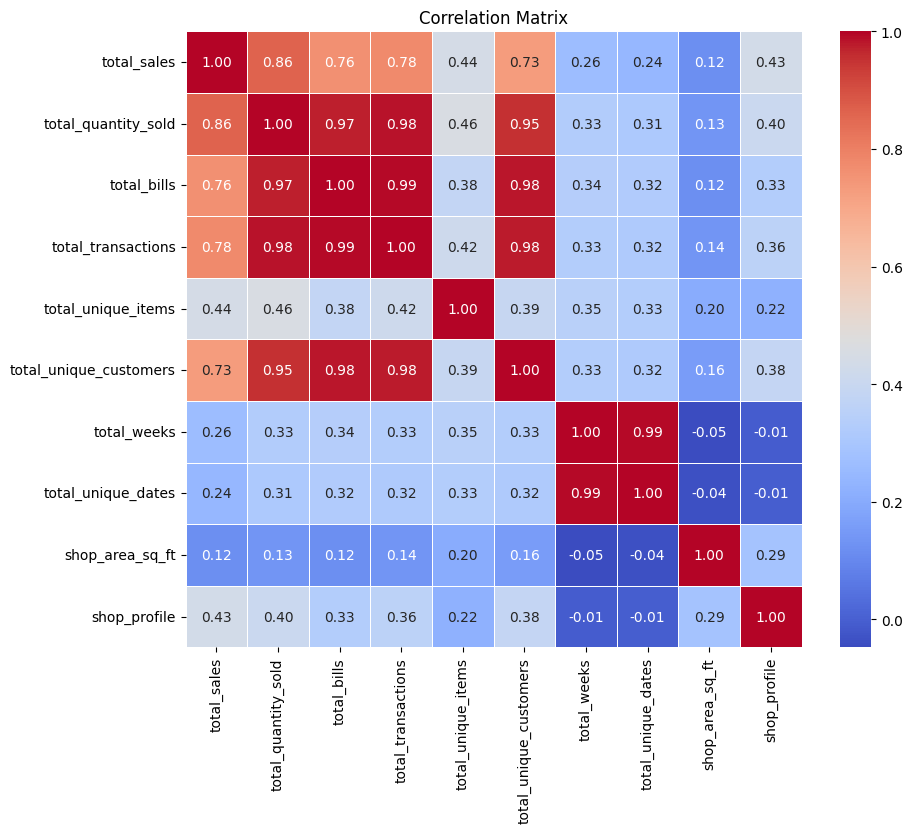

In [13]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True) # type: ignore
plt.title("Correlation Matrix")
plt.show()

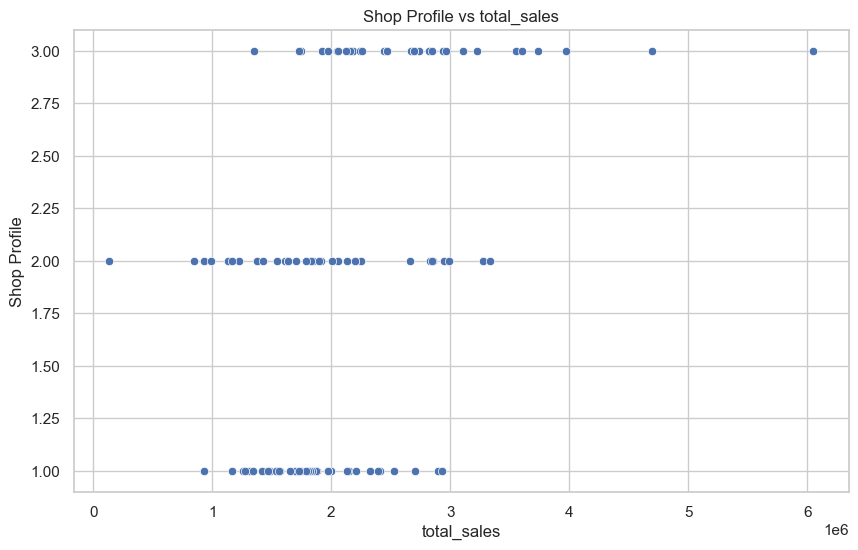

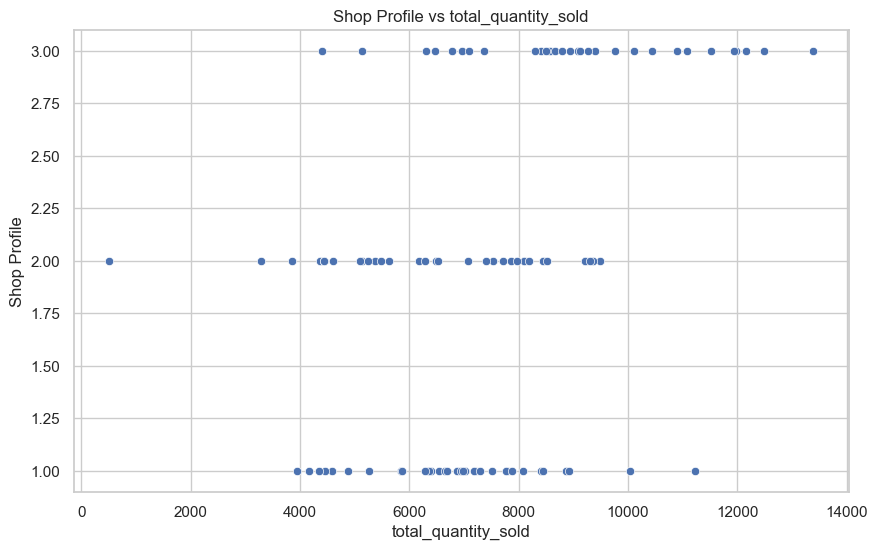

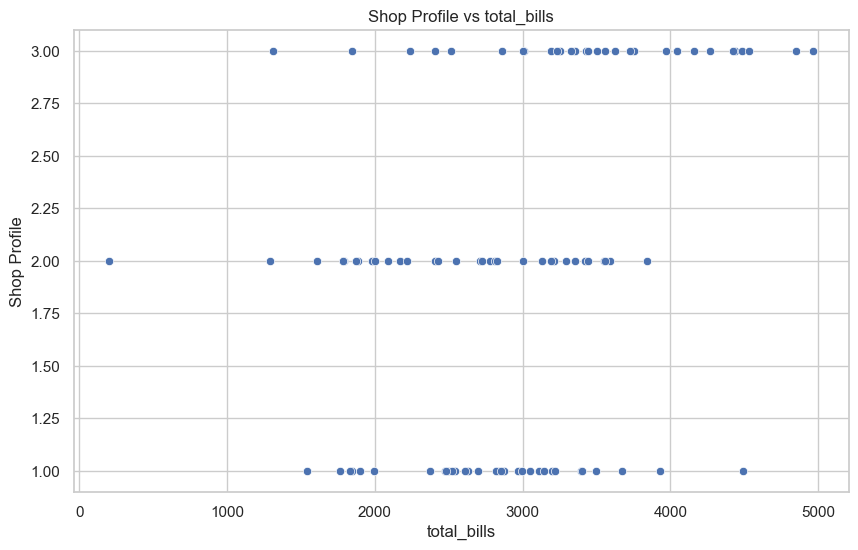

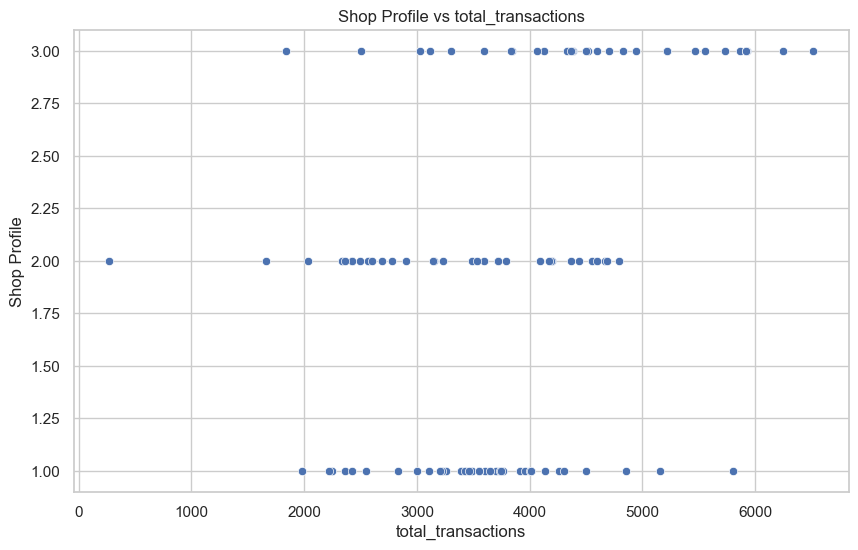

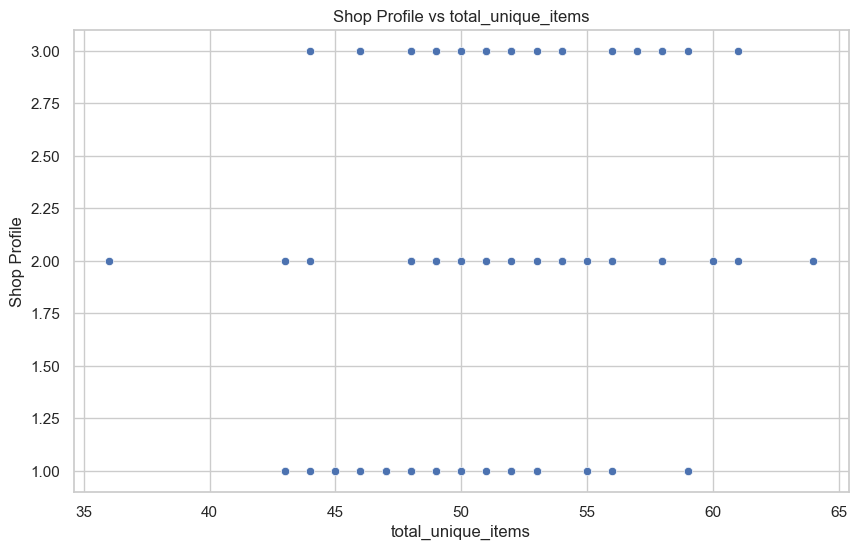

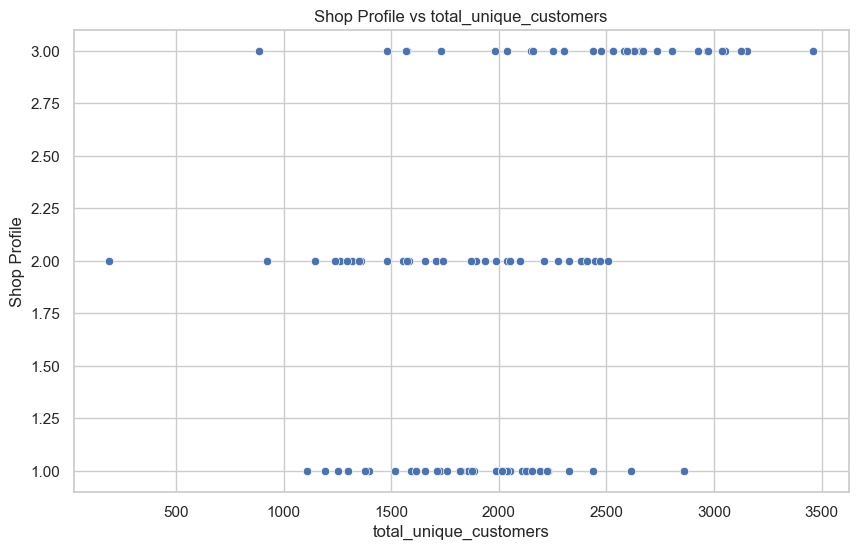

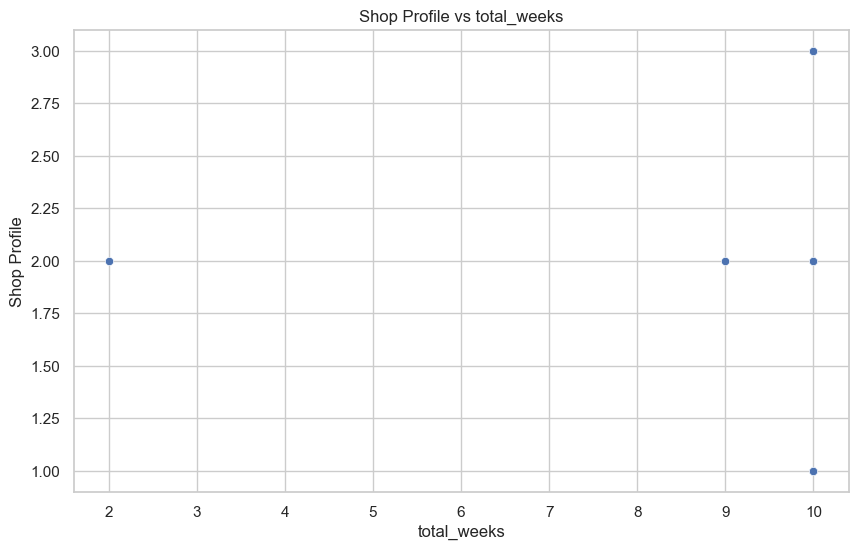

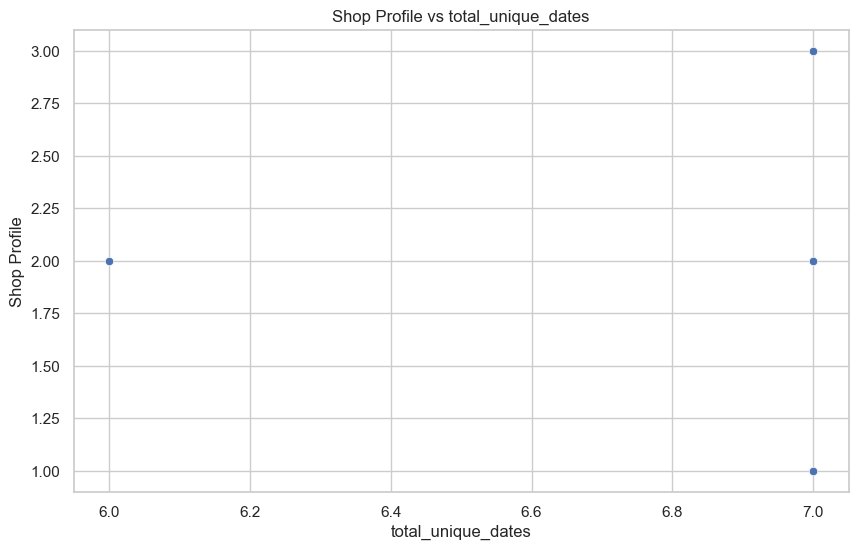

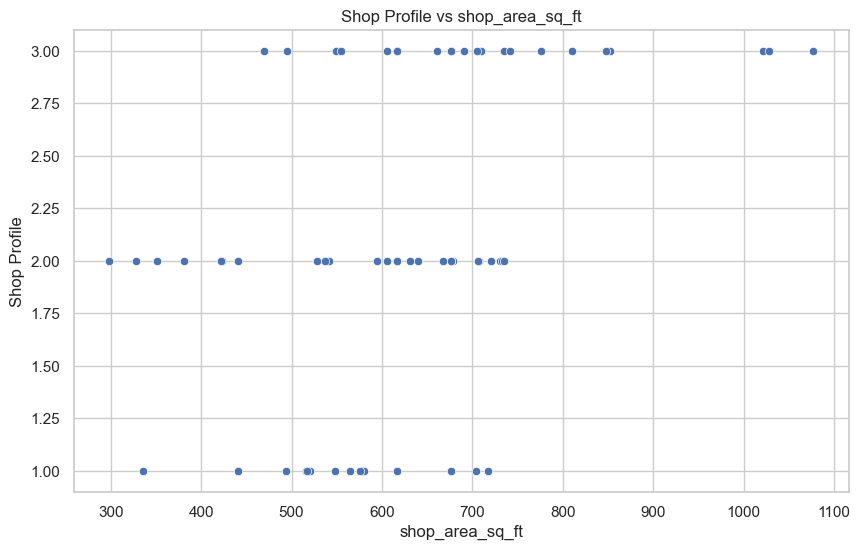

In [20]:
# Assuming you have the combined_features_with_profile DataFrame ready
features = [col for col in combined_features_with_profile.columns if col not in ['shop_id', 'shop_profile']]

# Set the plot style and size
sns.set(style='whitegrid', rc={'figure.figsize':(10, 6)})

# Create scatter plots for each feature
for feature in features:
    plt.figure()
    sns.scatterplot(data=combined_features_with_profile, x=feature, y='shop_profile')
    plt.title(f'Shop Profile vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Shop Profile')
    plt.show()


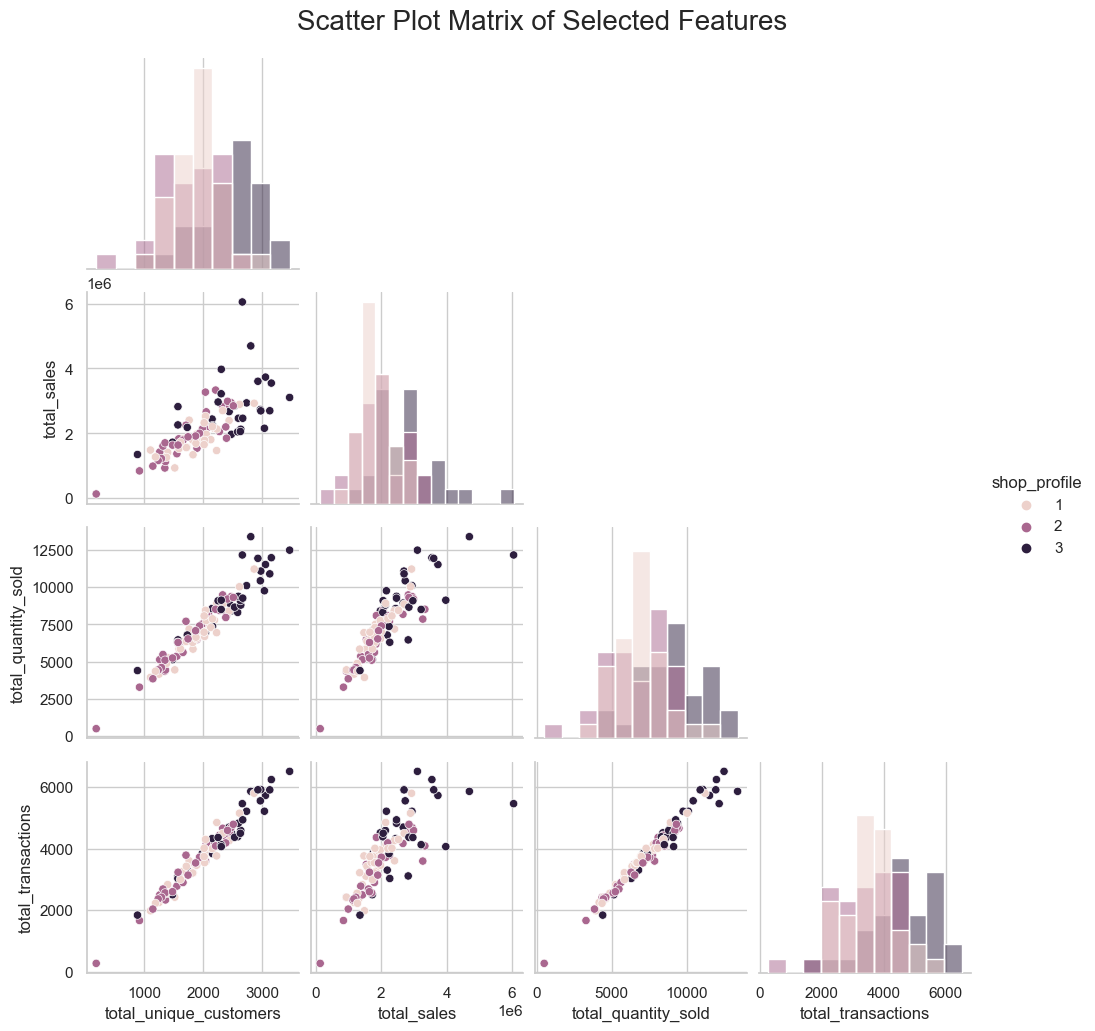

In [22]:
# Assuming you have the combined_features_with_profile DataFrame ready
selected_features = ['total_unique_customers', 'total_sales', 'total_quantity_sold', 'total_transactions']

# Create a pairplot (scatter plot matrix) with colored points based on shop_profile
sns.set(style='whitegrid', rc={'figure.figsize':(12, 12)})
pairplot = sns.pairplot(combined_features_with_profile, vars=selected_features, hue='shop_profile', corner=True, diag_kind='hist')

plt.suptitle('Scatter Plot Matrix of Selected Features', fontsize=20, y=1.03)
plt.show()


## Conclution: Generate new features to achieve better relationships